Epoch [10/100], Loss: 0.7318
Epoch [20/100], Loss: 0.3474
Epoch [30/100], Loss: 0.3231
Epoch [40/100], Loss: 0.3019
Epoch [50/100], Loss: 0.2822
Epoch [60/100], Loss: 0.2637
Epoch [70/100], Loss: 0.2464
Epoch [80/100], Loss: 0.2303
Epoch [90/100], Loss: 0.2152
Epoch [100/100], Loss: 0.2011


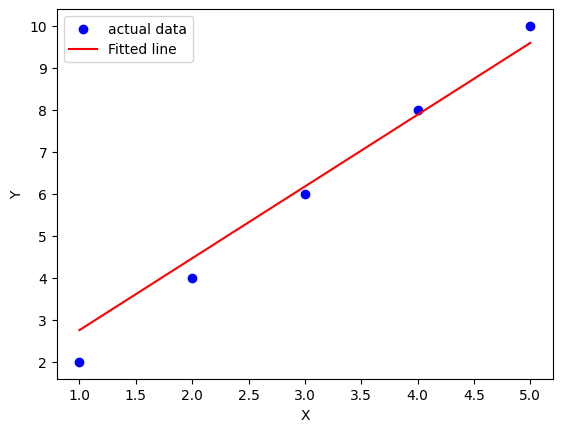

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5], dtype=np.float32).reshape(-1, 1)
Y = np.array([2,4,6,8,10], dtype=np.float32).reshape(-1, 1)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

class LinearModel(nn.Module):

    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        return self.linear(x)
    
model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass: Compute predicted Y by passing X to the model
    Y_pred = model(X_tensor)

    # Compute the loss
    loss = criterion(Y_pred, Y_tensor)

    # Backward pass: Compute gradients
    loss.backward()

    # Update weights
    optimizer.step()
    
    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot the result
plt.scatter(X,Y, color='blue', label='actual data')
plt.plot(X, model(X_tensor).detach().numpy(), color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


